In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_df = pd.read_csv('Google_Stock_Price_Train.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [3]:
test_df = pd.read_csv('Google_Stock_Price_Test.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


In [4]:
train = train_df.loc[:,["Open"]].values
train.shape

(1258, 1)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [6]:
train_scaled = scaler.fit_transform(train)

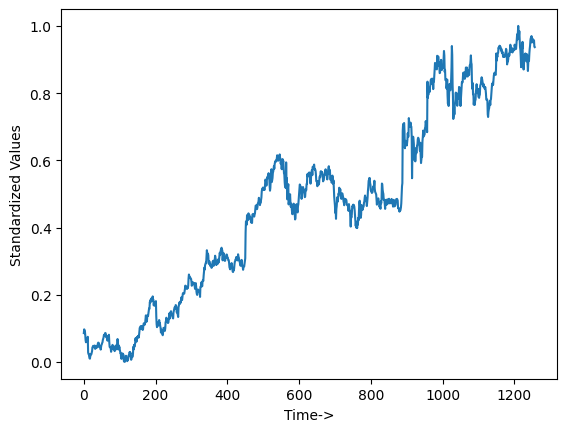

In [7]:
plt.plot(train_scaled)
plt.ylabel("Standardized Values")
plt.xlabel("Time->")
plt.show()

In [8]:
x_train = []
y_train = []
time = 60
for i in range(60,train_scaled.shape[0]):
    x_train.append(train_scaled[i-60:i,0])
    y_train.append(train_scaled[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)

In [9]:
x_train.shape,y_train.shape

((1198, 60), (1198,))

In [10]:
x_train = np.reshape(x_train,newshape=(x_train.shape[0],x_train.shape[1],1))
x_train.shape

C:\Users\vaish\AppData\Local\Temp\ipykernel_16864\3502120353.py:1: DeprecationWarning: `newshape` keyword argument is deprecated, use `shape=...` or pass shape positionally instead. (deprecated in NumPy 2.1)
  x_train = np.reshape(x_train,newshape=(x_train.shape[0],x_train.shape[1],1))


(1198, 60, 1)

In [11]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN,Dropout

In [12]:
model = Sequential()

model.add(SimpleRNN(units=50,activation = "tanh", return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50,activation = "tanh", return_sequences = True))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50,activation = "tanh", return_sequences = True))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mse')
model.summary()

C:\Users\vaish\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 60, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 60, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 60, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,801 (69.54 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.fit(x_train,y_train,epochs=50,batch_size=30,validation_split=0.05)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 43s 262ms/step - loss: 0.5286 - val_loss: 0.0229
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - loss: 0.3904 - val_loss: 0.0329
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - loss: 0.2621 - val_loss: 0.0232
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - loss: 0.1815 - val_loss: 0.0169
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - loss: 0.1512 - val_loss: 0.0077
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - loss: 0.1350 - val_loss: 8.3627e-04
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - loss: 0.1223 - val_loss: 0.0037
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - loss: 0.0883 - val_loss: 0.0034
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - loss: 0.0646 - val_loss: 0.0275
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - loss: 0.0803 - val_loss: 0.0056
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - loss: 0.0613 - val_loss: 0.0011
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms

In [14]:
data = pd.concat((train_df['Open'],test_df['Open']),axis=0)

In [15]:
test_input = data.iloc[len(data) - len(test_df) - time : ].values
test_input.shape

(80,)

In [16]:
test_input = test_input.reshape(-1,1)
test_input.shape

(80, 1)

In [17]:
test_scaled = scaler.transform(test_input)

In [18]:
x_test = []
for i in range(time,test_scaled.shape[0]):
    x_test.append(test_scaled[i - time: i,0 ])
x_test = np.array(x_test)
x_test.shape

(20, 60)

In [19]:
x_test = np.reshape(x_test,newshape=(x_test.shape[0],x_test.shape[1],1))
x_test.shape

C:\Users\vaish\AppData\Local\Temp\ipykernel_16864\2200062050.py:1: DeprecationWarning: `newshape` keyword argument is deprecated, use `shape=...` or pass shape positionally instead. (deprecated in NumPy 2.1)
  x_test = np.reshape(x_test,newshape=(x_test.shape[0],x_test.shape[1],1))


(20, 60, 1)

In [20]:
y_test = test_df.loc[:,"Open"].values

In [21]:
y_pred = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [22]:
y_pred = scaler.inverse_transform(y_pred)

In [23]:
output = model.evaluate(x=x_test,y=y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 650808.1250


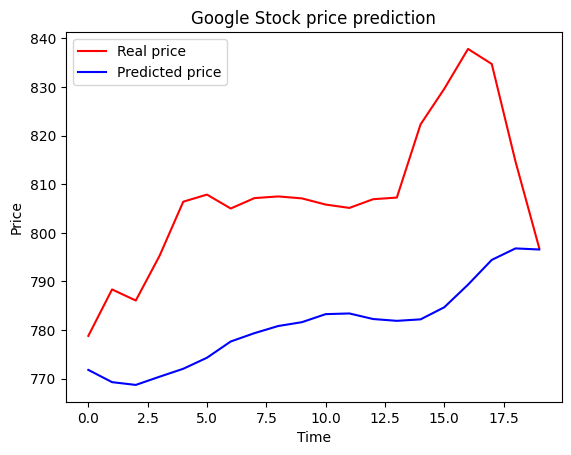

In [24]:
plt.plot(y_test, color = 'red', label = 'Real price')
plt.plot(y_pred, color = 'blue', label = 'Predicted price')

plt.title('Google Stock price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()